## Convert this notebook to executable python script using:

- jupyter nbconvert --to python Analyze.ipynb

# Import Modules

## Standard Packages

In [1]:
import os
import sys
import os.path as path
import psutil
import glob
import random
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import json
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from datetime import date, datetime, timedelta, time
from timeit import default_timer as timer
import time

## Scikit-Learn

In [2]:
#from sklearn.svm import SVC, SVR
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#from sklearn.neural_network import MLPClassifier, MLPRegressor

#from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
#from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, classification_report


## User-Defined Functions

In [3]:
current_running_file_dir = sys.path[0]
current_running_file_par = '/'.join(sys.path[0].split('/')[:-1])
sys.path.insert(0, os.path.join(current_running_file_par, 'Step1_ExtractData'))
sys.path.insert(0, os.path.join(current_running_file_par, 'Step2_PrepareData'))
sys.path.insert(0, os.path.join(current_running_file_par, 'Step3_TrainModel'))

In [4]:
from Extract_DFM_Data_Helper import *
from Prepare_TrainTest_Data_Helper import *
from TrainModel_Helper import *
from Analyze_Helper import *

In [5]:
# []
'''
To move this to helper function. Need to tackel the path
'''
def scale_predict_plot(FM_label_type, model, model_name, scaler_type, X_gt, y_gt, \
                       analysis_data_loc, analysis_scatter_file_name, \
                       max_data_size_scatter, fig_size_x, fig_size_y, \
                       font_size, x_lim, \
                       analysis_cm_file_name,
                       normalize_cm, \
                        class_labels, \
                       j_indices, i_indices,\
                       analysis_fuel_map_file_name):
    
    ### Scale Features
    print ('Data scaler type: {}'.format(scaler_type))
    scaler = define_scaler (scaler_type)
    scaler.fit(X_gt)
    X_gt_scaled = scaler.transform(X_gt)

    ### Prediction and Evaluation with Trained Model
    labels_pred = predict(model, X_gt_scaled, "Data at TimeStamp")

    accuracy = get_accuracy_score(model, FM_label_type, \
                                       X_gt_scaled, y_gt, labels_pred,\
                                       "Data at TimeStamp")

    if (FM_label_type == 'Binary' or FM_label_type == 'MultiClass'):
        conf_mat = get_confusion_matrix (FM_label_type, y_gt, labels_pred, \
                                          "Data at TimeStamp", class_labels)
        get_classification_report (FM_label_type, y_gt, labels_pred, \
                              "Data at TimeStamp", class_labels)
    else:
        conf_mat = None
        print('Confusion Matrix is not suitable for label_type: {}'.format(FM_label_type))


    if (FM_label_type == 'Binary'):
        average_precision_train = average_precision_score(y_gt, labels_pred)
        print('Average precision-recall score for Train Data: {0:0.2f}'.format(
              average_precision_train))


    ### Plot Scatter or Confusion Matrix
    if (FM_label_type == 'Regression'):
        plot_scatter_regression (y_gt.to_numpy(), labels_pred, accuracy, model_name, \
                                analysis_data_loc, analysis_scatter_file_name, \
                                max_data_size_scatter, fig_size_x, fig_size_y, \
                                font_size, x_lim)
    else:
        plot_confusion_matrix (conf_mat, accuracy, model_name, \
                               analysis_data_loc, analysis_cm_file_name, \
                               fig_size_x, fig_size_y, \
                               font_size,\
                               normalize_cm, \
                               class_labels)


    ### Plot Ground Truth and Prediction At the Desired Time Stamp
    plot_fm (y_gt, labels_pred, j_indices, i_indices, FM_label_type, \
             analysis_data_loc, analysis_fuel_map_file_name, class_labels)

# Global Start Time and Memory

In [6]:
global_start_time = timer()
process = psutil.Process(os.getpid())
global_initial_memory = process.memory_info().rss

# Read the Input JSON File

### Input file name when using jupyter notebook

In [7]:
json_file_extract_data = '/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/InputJson/Extract/json_extract_data_015.json'
json_file_prep_data    = '/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/InputJson/Prep/json_prep_data_label_001.json'
json_file_train_model  = '/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/InputJson/Train/json_train_model_003.json'
json_file_analyze      = '/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/InputJson/Analyze/json_analyze_001.json'

### Input file name when using python script on command line

In [8]:
#json_file_extract_data = sys.argv[1]
#json_file_prep_data = sys.argv[2]
#json_file_train_model = sys.argv[3]
#json_file_analyze  = sys.argv[4]

### Load the JSON file for extracting data

In [9]:
print('Loading the JSON file for extracting data: \n {}'.format(json_file_extract_data))

Loading the JSON file for extracting data: 
 /p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/InputJson/Extract/json_extract_data_015.json


In [10]:
with open(json_file_extract_data) as json_file_handle:
    json_content_extract_data = json.load(json_file_handle)

In [11]:
#json_content_extract_data

### Load the JSON file for preparing data

In [12]:
print('Loading the JSON file for preparing data: \n {}'.format(json_file_prep_data))

Loading the JSON file for preparing data: 
 /p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/InputJson/Prep/json_prep_data_label_001.json


In [13]:
with open(json_file_prep_data) as json_file_handle:
    json_content_prep_data = json.load(json_file_handle)

In [14]:
#json_content_prep_data

### Load the JSON file for training model

In [15]:
print('Loading the JSON file for training model: \n {}'.format(json_file_train_model))

Loading the JSON file for training model: 
 /p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/InputJson/Train/json_train_model_003.json


In [16]:
with open(json_file_train_model) as json_file_handle:
    json_content_train_model = json.load(json_file_handle)

In [17]:
#json_content_train_model

### Load the JSON file for analysis

In [18]:
print('Loading the JSON file for analysis: \n {}'.format(json_file_analyze))

Loading the JSON file for analysis: 
 /p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/InputJson/Analyze/json_analyze_001.json


In [19]:
with open(json_file_analyze) as json_file_handle:
    json_content_analyze = json.load(json_file_handle)

In [20]:
#json_content_analyze

# Variables to be Used for Analysis

## DataSet Defintion

In [21]:
# The current data set params
data_set_count = json_content_extract_data['data_set_defn']['data_set_count']
max_history_to_consider = json_content_extract_data['data_set_defn']['max_history_to_consider']
history_interval = json_content_extract_data['data_set_defn']['history_interval']

## Nevada Data

In [22]:
nevada_data = json_content_extract_data['nevada_data']
remove_nevada = nevada_data['remove_nevada']
j_nevada, i_nevada = nevada_data['j_nevada'], nevada_data['i_nevada']
j_anchor, i_anchor = nevada_data['j_anchor'], nevada_data['i_anchor']

## Clip Data for Train/Test

In [23]:
clip_data_train_test = json_content_extract_data['clip_data_train_test']
x_clip_train_test = clip_data_train_test['x_clip']
y_clip_train_test = clip_data_train_test['y_clip']

## Define Label, FM Threshold etc.

In [24]:
label_count = json_content_prep_data['label_defn']['label_count']

In [25]:
FM_labels = json_content_prep_data['FM_labels']

In [26]:
FM_label_type = FM_labels['label_type']

class_labels = None
if (FM_label_type == 'Binary'):
    FM_binary_threshold = FM_labels['FM_binary_threshold']
    class_labels = range(2)
if (FM_label_type == 'MultiClass'):
    FM_MC_levels = FM_labels['FM_MC_levels']
    class_labels = range(len(FM_MC_levels) -1)

In [27]:
FM_hr = json_content_prep_data['qoi_to_plot']['FM_hr']

In [28]:
features_to_use = json_content_prep_data['features']['features_to_use']

## Define ML Model and Params etc.

### Model Definition 

In [29]:
model_count = json_content_train_model['models']['model_count']
scaler_type = json_content_train_model['models']['scaler_type']
model_name = json_content_train_model['models']['model_name'] # ['RF', SVM', 'MLP']
#model_params = json_content_train_model['models']['params']

## Define Analysis Inputs

In [30]:
analysis_count = json_content_analyze['analysis_count']

### Paths

In [31]:
analysis_data_paths = json_content_analyze['paths']
analysis_data_desired = json_content_analyze['analysis_data_desired']

### Data Types, Time Stamps and Regions of Interest

In [32]:
analysis_data_defined = [analysis_data_elem \
                         for analysis_data_elem in analysis_data_desired \
                         if analysis_data_elem in json_content_analyze]

In [33]:
print ('Analysis desired to be performed on the following data sets:\n {}'.format(\
                                                            analysis_data_desired))

print ('Time and Region Info available for these data sets out of those desired:\n {}'\
                                                    .format(analysis_data_defined))

Analysis desired to be performed on the following data sets:
 ['SJSU', 'HRRR', 'RRM']
Time and Region Info available for these data sets out of those desired:
 ['SJSU', 'HRRR', 'RRM']


In [34]:
time_region_info = get_time_region_info (analysis_data_defined, json_content_analyze)
#time_region_info

Extracting Time and Region Info for SJSU
Extracting Time and Region Info for HRRR
Extracting Time and Region Info for RRM

Time and Region Info for SJSU:
... Reference Time 1: 2018-11-08_22
... ... Region 1:, x_clip: [250, 390], y_clip: [100, 200]
... ... Region 2:, x_clip: [100, 250], y_clip: [300, 450]
... Reference Time 2: 2020-09-04_00
... ... Region 1:, x_clip: [250, 390], y_clip: [100, 200]
... ... Region 2:, x_clip: [100, 250], y_clip: [300, 450]

Time and Region Info for HRRR:
... Reference Time 1: 2025-09-03_16
... ... Region 1:, x_clip: [40, 60], y_clip: [70, 90]
... ... Region 2:, x_clip: [60, 100], y_clip: [50, 80]
... ... Region 3:, x_clip: [90, 120], y_clip: [120, 140]

Time and Region Info for RRM:
... Reference Time 1: 2030-08-02_20
... ... Region 1:, x_clip: [50, 80], y_clip: [30, 50]
... ... Region 2:, x_clip: [70, 90], y_clip: [50, 80]
... ... Region 3:, x_clip: [80, 110], y_clip: [100, 130]


### Analysis Plots Prefernces

In [35]:
analysis = json_content_train_model['evaluation']
fig_size_x = analysis['fig_size_x']
fig_size_y = analysis['fig_size_y']
font_size  = analysis['font_size']

if (FM_label_type == 'Regression'):
    max_data_size_scatter = analysis['max_data_size_scatter']
    x_lim      = analysis['x_lim']
    normalize_cm = False
else:
    max_data_size_scatter = None
    x_lim      = None
    normalize_cm = analysis['normalize_cm']

# Paths and File Names

#### Global

In [36]:
data_files_location = json_content_extract_data['paths']['data_files_location']
trained_model_base_loc = json_content_train_model['paths']['trained_model_base_loc']
analysis_data_base_loc = json_content_analyze['paths']['analysis_data_base_loc']

In [37]:
raw_data_paths = json_content_analyze['paths']['raw_data']

#### DataSet, Label, and Model Specific (Trained Model)

In [38]:
trained_model_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s'%(data_set_count, \
                                                        label_count, FM_label_type, \
                                                        model_count, model_name)

trained_model_loc = os.path.join(trained_model_base_loc, trained_model_name)

trained_model_file_name = '{}_model.pkl'.format(trained_model_name)

#### DataSet, Label, Model, and TimeStamp Specific (Analysis Data)

In [39]:
analysis_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s_analysis_%03d'%(\
                                                        data_set_count, \
                                                        label_count, FM_label_type, \
                                                        model_count, model_name,\
                                                        analysis_count)

analysis_loc = os.path.join(analysis_data_base_loc, analysis_name)
os.system('mkdir -p %s'%analysis_loc)

0

In [40]:
analysis_data_locations_all_types = get_analysis_data_locations_all_types (\
                                                    time_region_info, analysis_loc)
#analysis_data_locations_all_types

# Get History Time Stamps for All Desired Time Stamps

In [41]:
time_region_info = get_history_time_stamps_all_data_types (time_region_info, \
                                                           max_history_to_consider, \
                                                           history_interval)
#time_region_info

# Read the Data at All Desired Time Stamps

In [42]:
features_labels = json_content_extract_data['features_labels']
features_to_read = features_labels['features_to_read']
labels_to_read = features_labels['labels_to_read']
labels_ind_in_nc_file = features_labels['labels_ind_in_nc_file']

In [43]:
data_read_SJSU = read_SJSU_data_desired_times (time_region_info, data_files_location)

MODULE Name: "read_SJSU_data_desired_times"

Process in the module(): psutil.Process(pid=1783822, name='python3', status='running', started='12:53:38')
Module memory consumed: 219.195 MB
Module computing time: 6.118 s


# Create DataFrame of Data at Desired Time Stamps

### Get Grid Indices

In [44]:
data_at_timestamp = data_read_SJSU[list(data_read_SJSU.keys())[0]]
#data_at_timestamp

In [45]:
grid_indices_all, grid_indices_valid, grid_indices_all_flat, grid_indices_valid_flat = \
    get_grid_indices_given_data_at_timestamp (data_at_timestamp, \
                                              x_clip_train_test, y_clip_train_test, \
                                              j_nevada, i_nevada, j_anchor, i_anchor, 
                                              remove_nevada)

MODULE Name: "get_grid_indices_given_data_at_timestamp"

Process in the module(): psutil.Process(pid=1783822, name='python3', status='running', started='12:53:38')
MODULE Name: "process_elevation_at_timestamp"

Process in the module(): psutil.Process(pid=1783822, name='python3', status='running', started='12:53:38')
Module memory consumed: 0.000 MB
Module computing time: 0.003 s
Module memory consumed: 2.836 MB
Module computing time: 0.192 s


In [46]:
grid_indices_valid_reconst, grid_indices_valid_bool, valid_grid_ind_to_coord = \
                reconstruct_valid_grid_indices (grid_indices_valid_flat, data_at_timestamp)

MODULE Name: "reconstruct_valid_grid_indices"

Process in the module(): psutil.Process(pid=1783822, name='python3', status='running', started='12:53:38')

Reconstructing valid grid indices...
Module memory consumed: 18.742 MB
Module computing time: 0.089 s


### Now Create DataFrames at Desired Time Stamps

In [47]:
df_dict = dict()
for count_ref_time, item_ref_time in enumerate(time_region_info['SJSU']):
    timestamp_ref = [item_ref_time['RefTime']]
    timestamps_hist = item_ref_time['HistTime']
    #print(timestamp_ref, timestamps_hist)
    df_dict[item_ref_time['RefTime']] = create_dataframe_FM_atm_at_timestamp (\
                                       timestamp_ref, timestamps_hist, data_read_SJSU, \
                                       history_interval, \
                                       grid_indices_valid_flat, valid_grid_ind_to_coord)
    

MODULE Name: "create_dataframe_FM_atm_at_timestamp"

Process in the module(): psutil.Process(pid=1783822, name='python3', status='running', started='12:53:38')
Module memory consumed: 39.852 MB
Module computing time: 1.856 s
MODULE Name: "create_dataframe_FM_atm_at_timestamp"

Process in the module(): psutil.Process(pid=1783822, name='python3', status='running', started='12:53:38')
Module memory consumed: 28.426 MB
Module computing time: 1.863 s


# Prepare Data at All Desired Time Stamps for Prediction

In [48]:
for timestamp_count, timestamp in enumerate(df_dict.keys()):
    df_at_timestamp = df_dict[timestamp]
    
    ### Get Column Names in the DataFrame
    keys_identity, keys_FM, \
    keys_U10, keys_V10, keys_UMag10, \
    keys_T2, keys_RH, keys_PREC, keys_SW, \
                                keys_HGT = get_keys_from_extracted_data (df_at_timestamp, \
                                                                        train_test = False)
    
    keys_FM_Binary, keys_FM_MC = define_binary_and_MC_FM_labels (keys_FM)
    
    ### Define Labels and Features 
    keys_labels = define_labels(FM_label_type, keys_FM, keys_FM_Binary, keys_FM_MC)
    keys_features  = define_features(keys_UMag10, keys_T2, keys_RH, keys_PREC, keys_SW, \
                       features_to_use)
    
    ### Compute New Columns or Remove Some
    df_at_timestamp_prep = compute_wind_mag (df_at_timestamp, keys_U10, keys_V10, keys_UMag10)
    df_at_timestamp_prep = drop_wind_components (df_at_timestamp_prep, keys_U10, keys_V10)
    if FM_label_type == 'Binary':
        df_at_timestamp_prep = compute_binary_FM_labels(df_at_timestamp_prep, \
                                              keys_FM, keys_FM_Binary, FM_binary_threshold)
    if FM_label_type == 'MultiClass':
        df_at_timestamp_prep = compute_MC_FM_labels(df_at_timestamp_prep, \
                                          keys_FM, keys_FM_MC, FM_MC_levels)
        
    ### Split Data into Identity, Features, and Labels
    df_at_timestamp_prep = split_data_into_groups (df_at_timestamp_prep, \
                                       keys_identity, keys_labels, keys_features)
    
    ### Save the Prepared Data
    analysis_data_loc = analysis_data_locations_all_types['SJSU'][timestamp_count]
    prepared_data_file_name = '{}-{}.pkl'.format(analysis_name, timestamp)
    with open(os.path.join(analysis_data_loc, prepared_data_file_name), 'wb') as file_handle:
        pickle.dump(df_at_timestamp_prep, file_handle)
    print('Wrote prepared data in "{}" at "{}"'.format(prepared_data_file_name, analysis_data_loc))


Wrote prepared data in "dataset_015_label_001_Regression_model_003_RF_analysis_001-2018-11-08_22.pkl" at "/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/04_Analysis/dataset_015_label_001_Regression_model_003_RF_analysis_001/SJSU/2018-11-08_22"
Wrote prepared data in "dataset_015_label_001_Regression_model_003_RF_analysis_001-2020-09-04_00.pkl" at "/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/04_Analysis/dataset_015_label_001_Regression_model_003_RF_analysis_001/SJSU/2020-09-04_00"


# Generate seed for the random number generator

In [49]:
seed = generate_seed()
random_state = init_random_generator(seed)

# ML Model

## Load the Model

In [50]:
trained_model_file = os.path.join(trained_model_loc, trained_model_file_name)
model = pickle.load(open(trained_model_file, 'rb'))
print ('\nLoaded the ML model file at: {}\n'.format(trained_model_file))
print ('The model loaded is: {} \n'.format(model))
print ('Model params: \n {}'.format(model.get_params()))


Loaded the ML model file at: /p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/03_Trained_Models/dataset_015_label_001_Regression_model_003_RF/dataset_015_label_001_Regression_model_003_RF_model.pkl

The model loaded is: RandomForestRegressor() 

Model params: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Load the Prepared Data at All Desired Time Stamps and Scale Them

In [51]:
#time_region_info

Read prepared data from "dataset_015_label_001_Regression_model_003_RF_analysis_001-2018-11-08_22.pkl" at "/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/04_Analysis/dataset_015_label_001_Regression_model_003_RF_analysis_001/SJSU/2018-11-08_22"
Data scaler type: Standard
Prediction Time for Data at TimeStamp is 1.047 s
Accuracy for Data at TimeStamp is: -58.890136852542035
Confusion Matrix is not suitable for label_type: Regression
... ... Region 1:, x_clip: [250, 390], y_clip: [100, 200]
Data scaler type: Standard
Prediction Time for Data at TimeStamp is 0.264 s
Accuracy for Data at TimeStamp is: -67.47538170671613
Confusion Matrix is not suitable for label_type: Regression
... ... Region 2:, x_clip: [100, 250], y_clip: [300, 450]
Data scaler type: Standard
Prediction Time for Data at TimeStamp is 0.517 s
Accuracy for Data at TimeStamp is: -117.4082768014547
Confusion Matrix is not suitable for label_type: Regression
Read prepared data from "dataset_015_label_001_Regression_model_003_RF_an

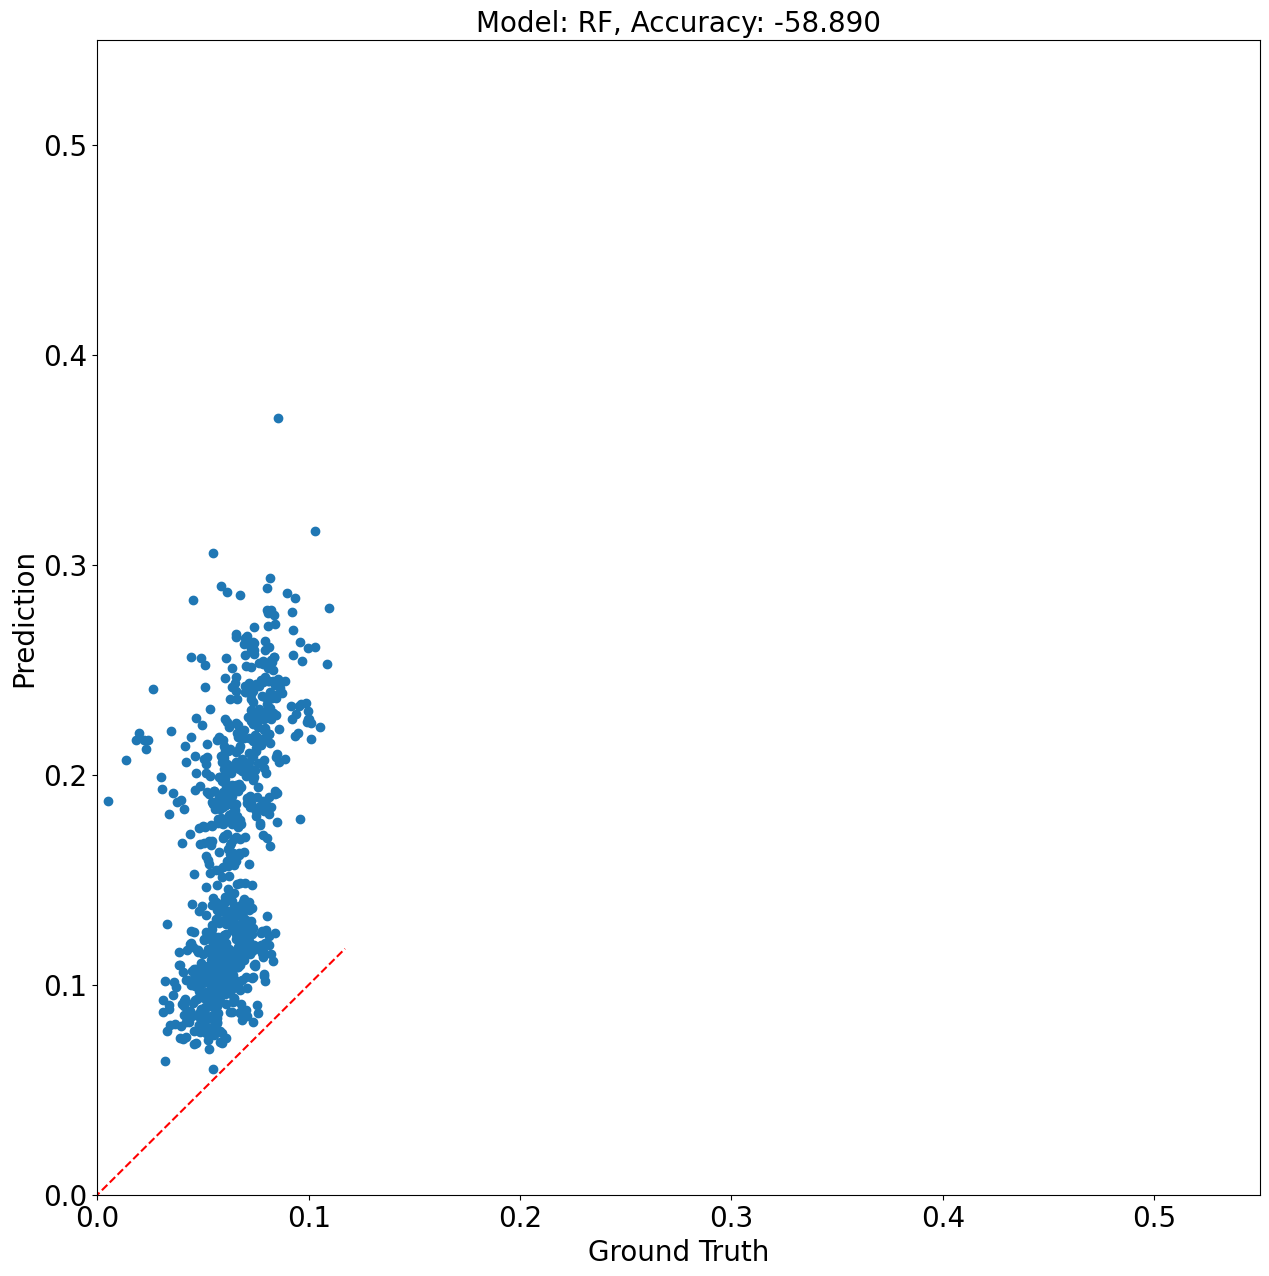

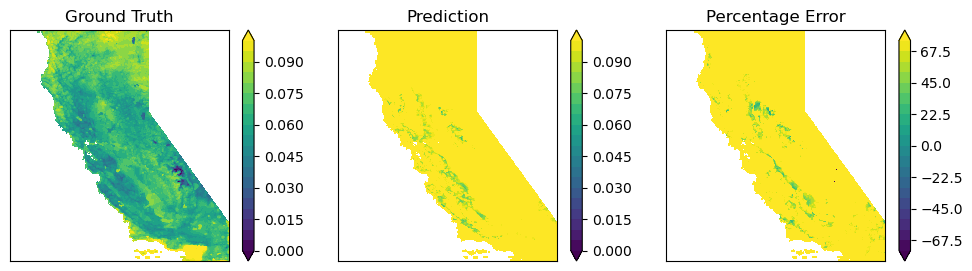

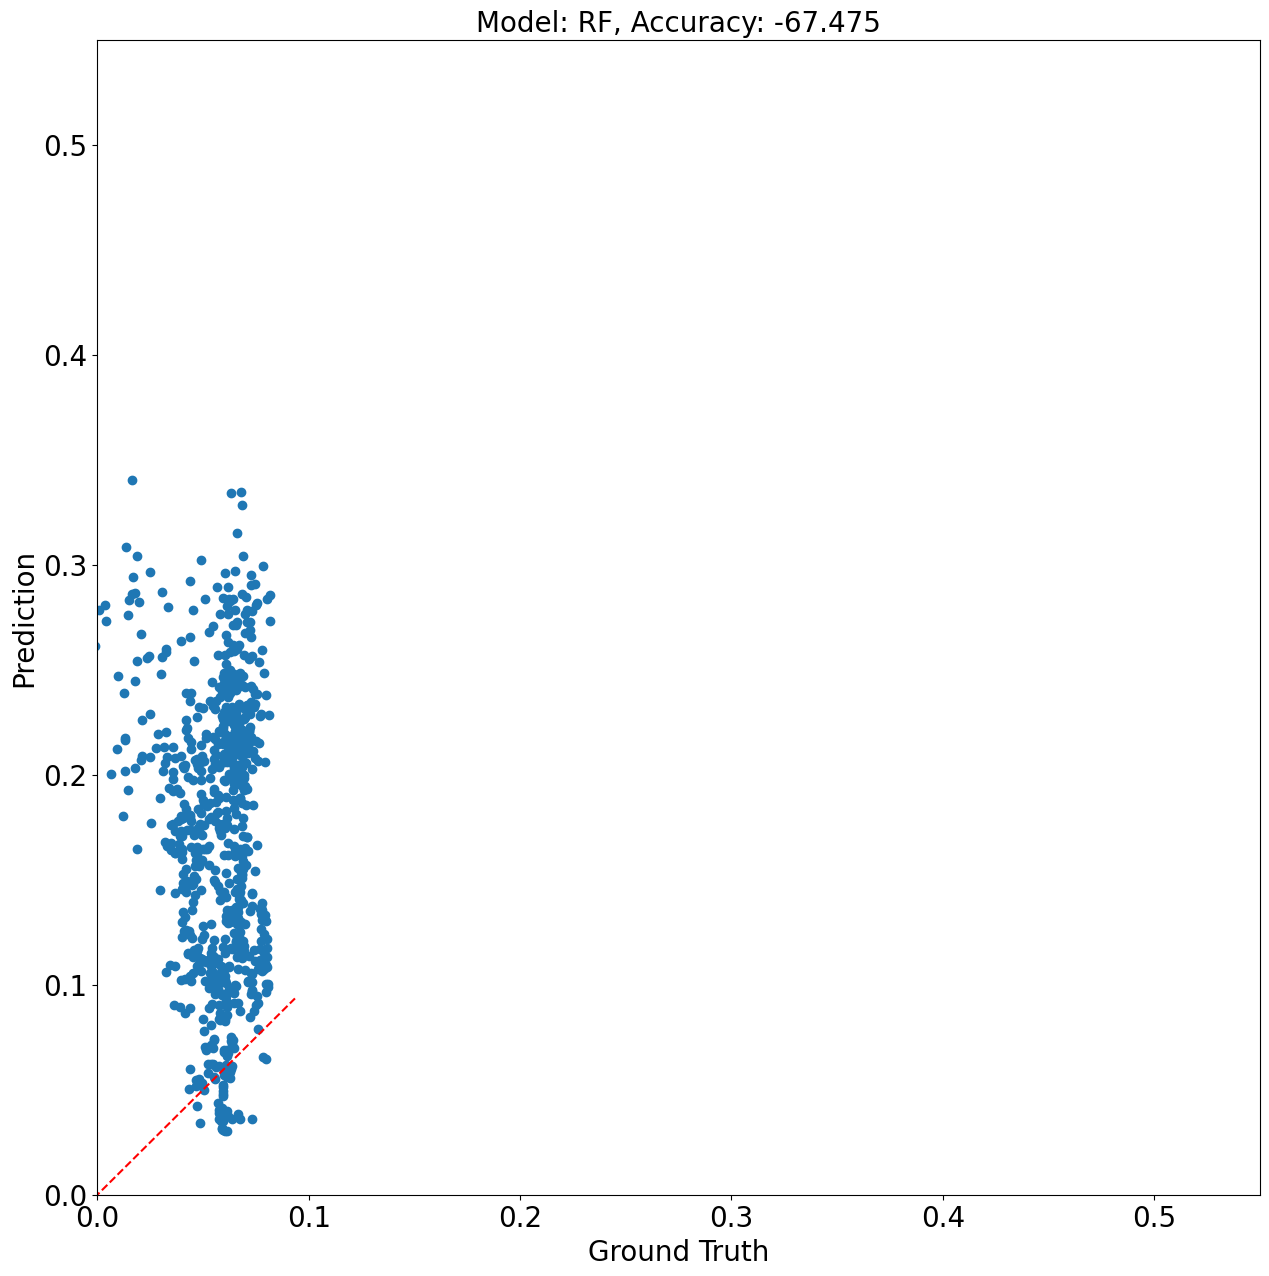

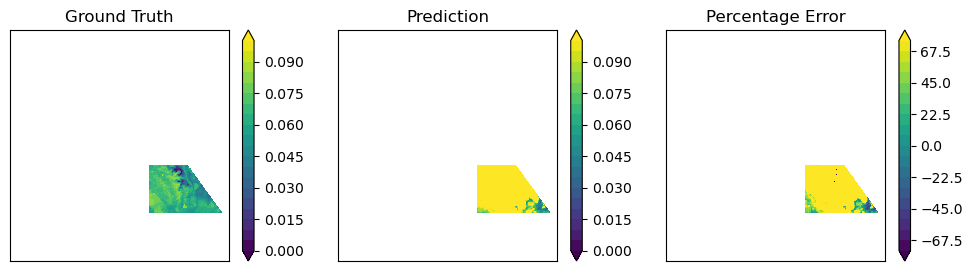

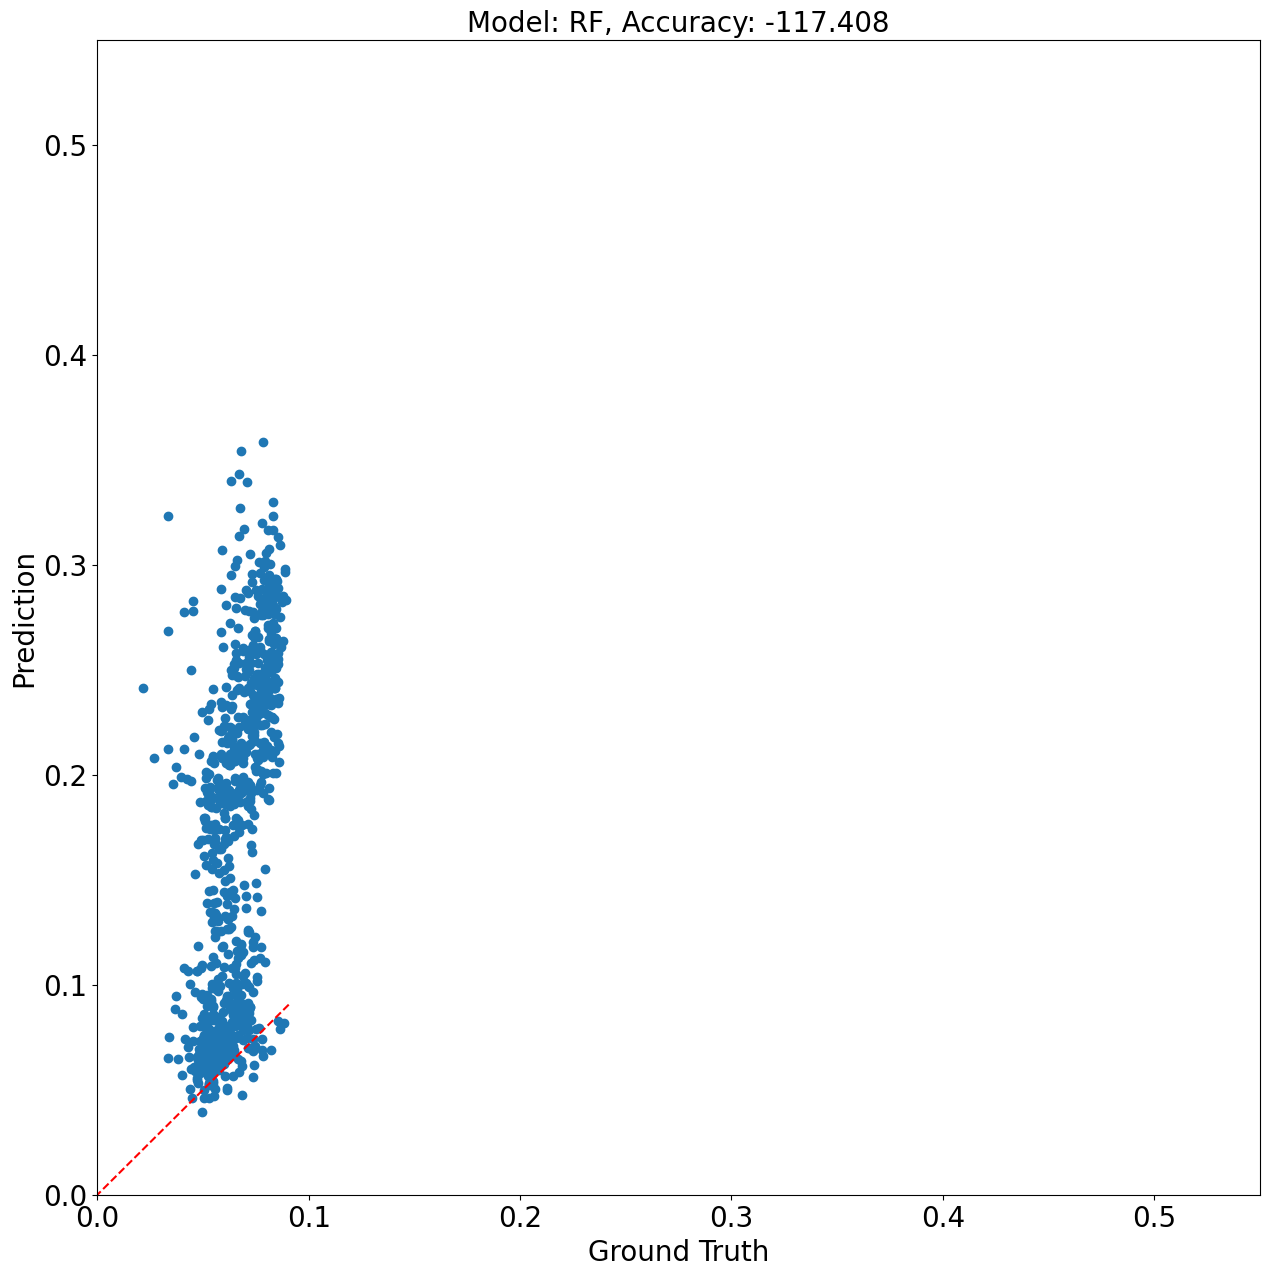

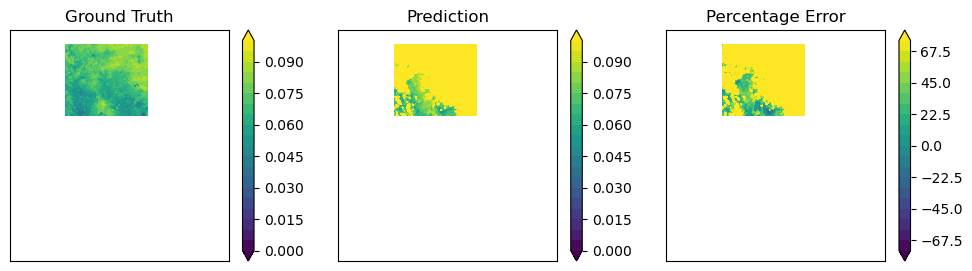

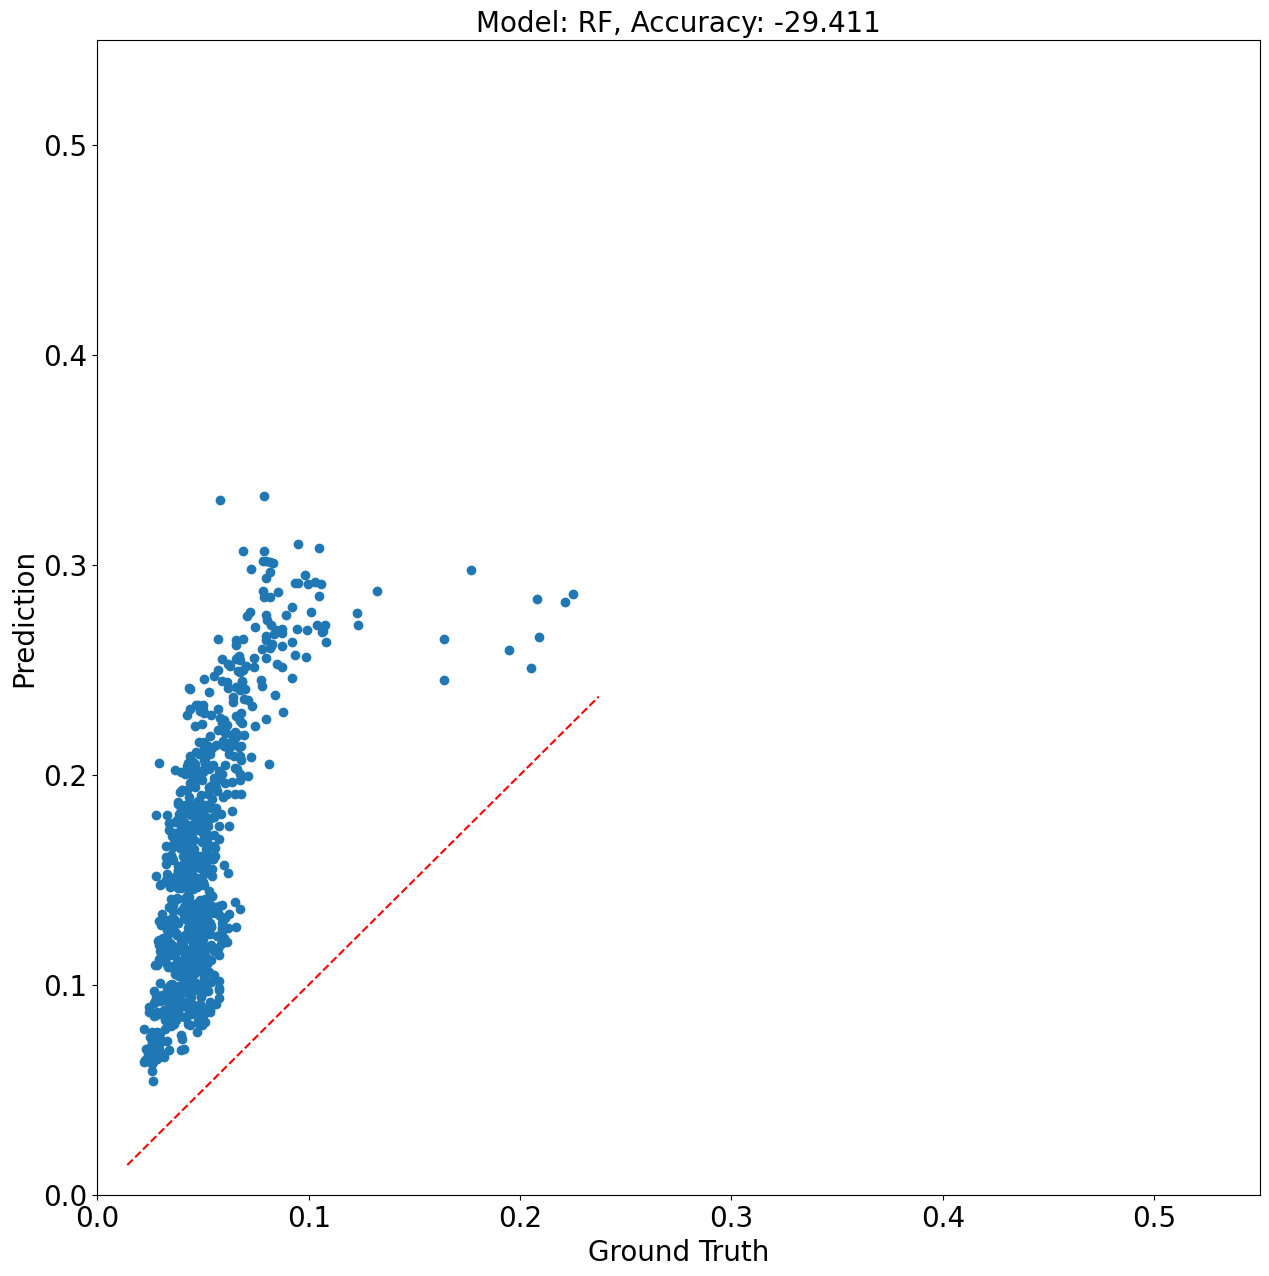

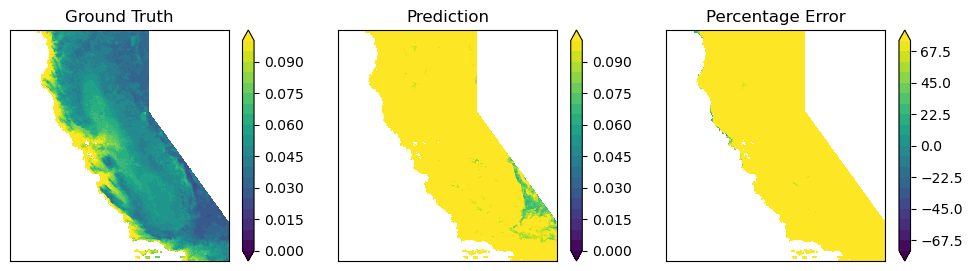

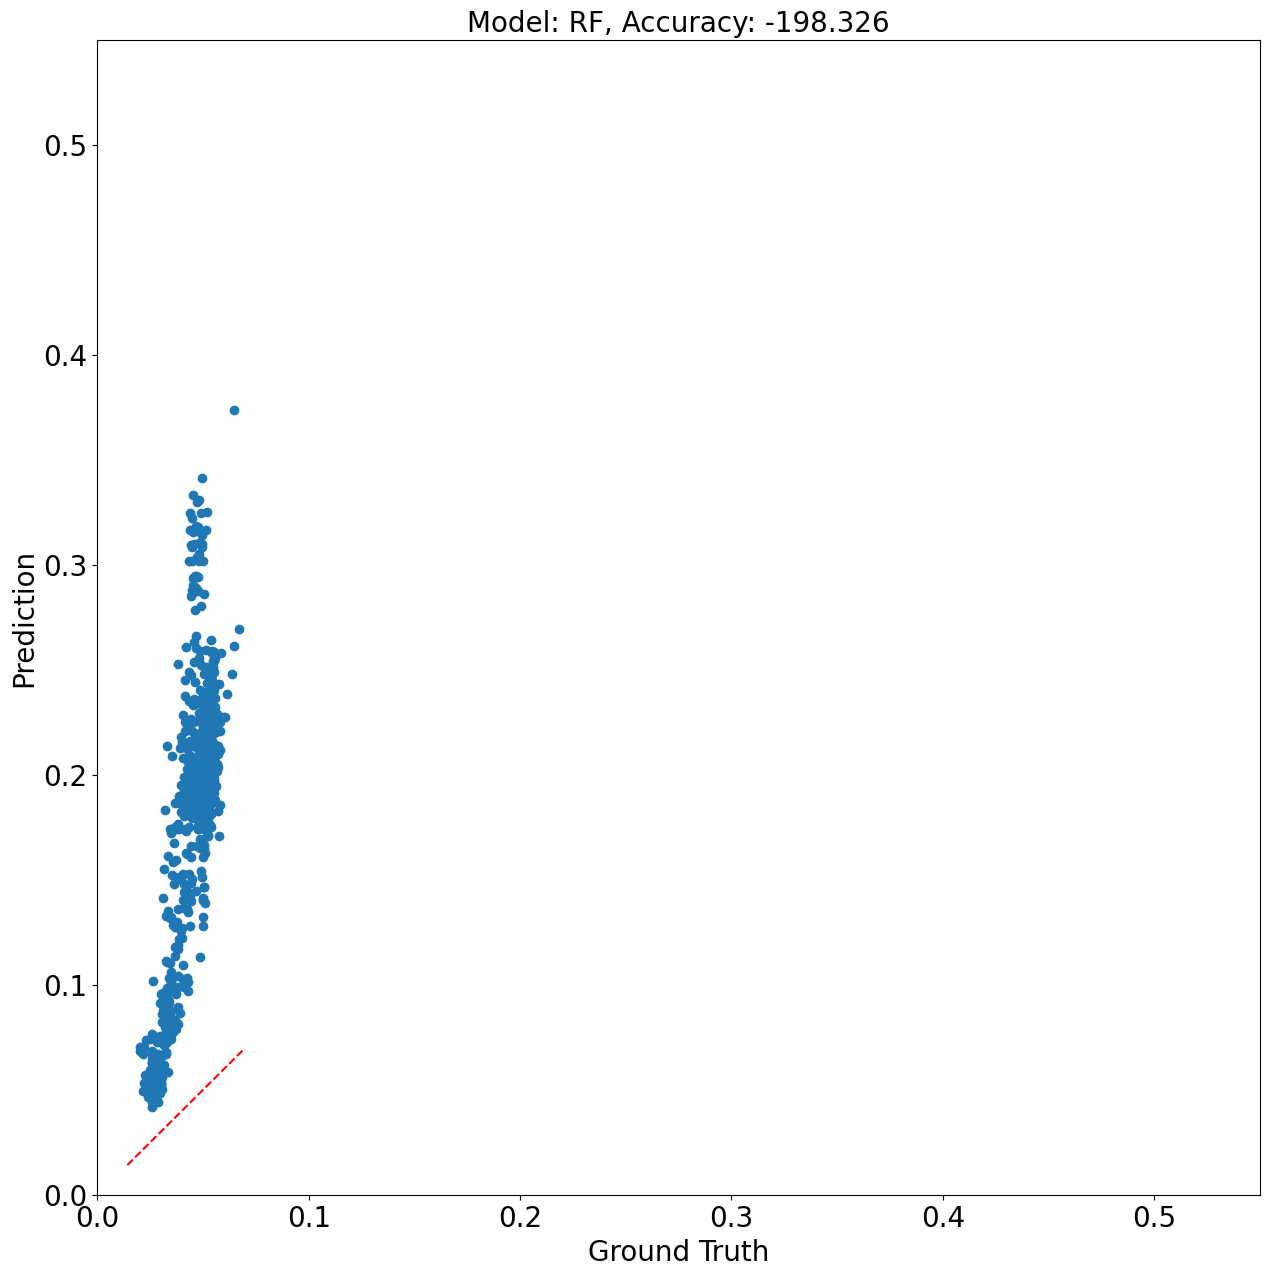

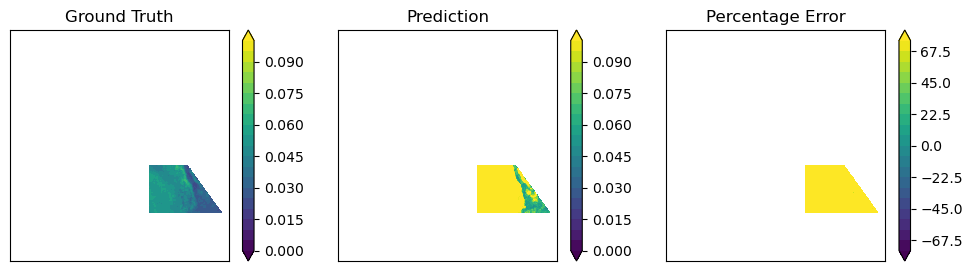

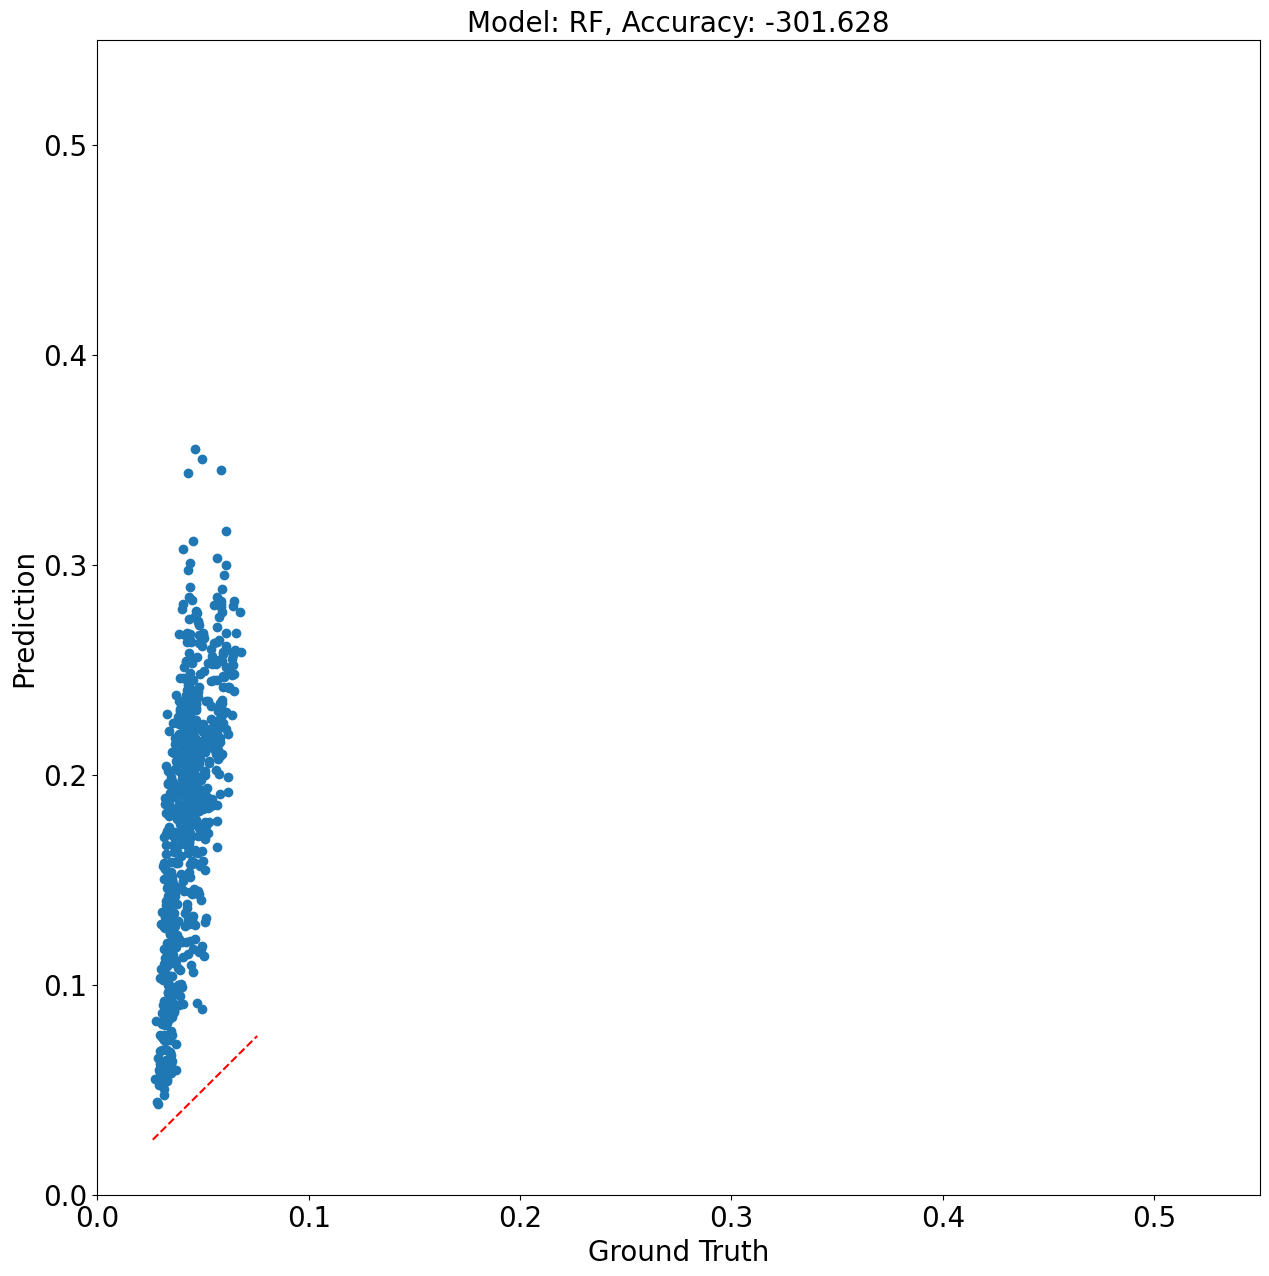

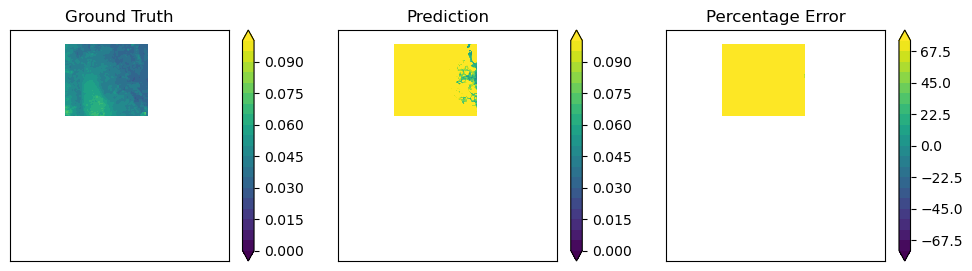

In [52]:
for timestamp_count, timestamp in enumerate(df_dict.keys()):
    analysis_data_loc = analysis_data_locations_all_types['SJSU'][timestamp_count]
    prepared_data_file_name = '{}-{}.pkl'.format(analysis_name, timestamp)

    analysis_scatter_file_name = '{}-{}_scatter_entire.png'.format(analysis_name, timestamp)
    analysis_cm_file_name = '{}-{}_cm_entire.png'.format(analysis_name, timestamp)

    analysis_fuel_map_file_name = '{}-{}_fm_entire.png'.format(analysis_name, timestamp)

    with open(os.path.join(analysis_data_loc, prepared_data_file_name), 'rb') as file_handle:
        prepared_data = pickle.load(file_handle)
    print('Read prepared data from "{}" at "{}"'.format(prepared_data_file_name, analysis_data_loc))

    ### Deal with Features
    features_to_use = prepared_data['features'].keys()
    #features_to_use

    ### Deal with Labels
    if (FM_label_type == 'Regression'):
        labels_to_use = ['FM_{}hr'.format(FM_hr)]
    elif (FM_label_type == 'Binary'):
        labels_to_use = ['FM_{}hr_bin'.format(FM_hr)]
    elif (FM_label_type == 'MultiClass'):
        labels_to_use = ['FM_{}hr_MC'.format(FM_hr)]
    else:
        raise ValueError('Invalid "label_type": {} in "FM_labels". \
                        \nValid types are: "Regression", "MultiClass", and "Binary"'.format(\
                                                                                FM_label_type))
    #labels_to_use

    ### Extract Features and Labels from Prepared Data
    X_gt     = prepared_data['features'][features_to_use]
    y_gt     = prepared_data['labels'][labels_to_use]
    j_indices = prepared_data['identity']['j_ind']
    i_indices = prepared_data['identity']['i_ind']


    scale_predict_plot(FM_label_type, model, model_name, scaler_type, X_gt, y_gt, \
                           analysis_data_loc, analysis_scatter_file_name, \
                           max_data_size_scatter, fig_size_x, fig_size_y, \
                           font_size, x_lim, \
                           analysis_cm_file_name,
                           normalize_cm, \
                            class_labels, \
                           j_indices, i_indices,\
                           analysis_fuel_map_file_name)


    ### Now deal with each region for the desired time stamp
    item_ref_time = time_region_info['SJSU'][timestamp_count]
    for count_regions, (x_clip, y_clip) in enumerate(\
        zip (item_ref_time['regions_x_indices'], item_ref_time['regions_y_indices'])):
        print ('... ... Region {}:, x_clip: {}, y_clip: {}'.format(\
                        count_regions + 1, x_clip, y_clip))
        region = 'region_%03d'%(count_regions + 1)
        analysis_scatter_file_name = '{}-{}_scatter_region_{}.png'.format(analysis_name, \
                                                                timestamp, region)
        analysis_cm_file_name = '{}-{}_cm_region_{}.png'.format(analysis_name,  \
                                                                timestamp, region)
        analysis_fuel_map_file_name = '{}-{}_fm_region_{}.png'.format(analysis_name,  \
                                                                timestamp, region)

        X_gt     = prepared_data['features'][features_to_use][(prepared_data['identity']['j_ind'] > y_clip[0]) &
                           (prepared_data['identity']['j_ind'] < y_clip[1]) &
                           (prepared_data['identity']['i_ind'] > x_clip[0]) &
                           (prepared_data['identity']['i_ind'] < x_clip[1])]

        y_gt     = prepared_data['labels'][labels_to_use][(prepared_data['identity']['j_ind'] > y_clip[0]) &
                           (prepared_data['identity']['j_ind'] < y_clip[1]) &
                           (prepared_data['identity']['i_ind'] > x_clip[0]) &
                           (prepared_data['identity']['i_ind'] < x_clip[1])]

        j_indices = prepared_data['identity'][(prepared_data['identity']['j_ind'] > y_clip[0]) &
                           (prepared_data['identity']['j_ind'] < y_clip[1]) &
                           (prepared_data['identity']['i_ind'] > x_clip[0]) &
                           (prepared_data['identity']['i_ind'] < x_clip[1])]['j_ind']
        i_indices = prepared_data['identity'][(prepared_data['identity']['j_ind'] > y_clip[0]) &
                               (prepared_data['identity']['j_ind'] < y_clip[1]) &
                               (prepared_data['identity']['i_ind'] > x_clip[0]) &
                               (prepared_data['identity']['i_ind'] < x_clip[1])]['i_ind']

        if (len(X_gt) > 0):
            scale_predict_plot(FM_label_type, model, model_name, scaler_type, X_gt, y_gt, \
                               analysis_data_loc, analysis_scatter_file_name, \
                               max_data_size_scatter, fig_size_x, fig_size_y, \
                               font_size, x_lim, \
                               analysis_cm_file_name,
                               normalize_cm, \
                                class_labels, \
                               j_indices, i_indices,\
                               analysis_fuel_map_file_name)


# Global End Time and Memory

In [53]:
global_final_memory = process.memory_info().rss
global_end_time = timer()
global_memory_consumed = global_final_memory - global_initial_memory
print('Total memory consumed: {:.3f} MB'.format(global_memory_consumed/(1024*1024)))
print('Total computing time: {:.3f} s'.format(global_end_time - global_start_time))
print('=========================================================================')
print("SUCCESS: Done Training and Testing of Model")

Total memory consumed: 4288.086 MB
Total computing time: 35.912 s
SUCCESS: Done Training and Testing of Model
